<a href="https://colab.research.google.com/github/delowerhossentuhin/CVPR/blob/main/MID/nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder
np.random.seed(0)

In [2]:
df = pd.read_excel("Random.xlsx")

In [3]:
df.head(20)

,A,B,Label
0,131,138,2
1,54,133,1
2,51,137,1
3,52,63,1
4,149,59,2
5,126,18,1
6,33,86,1
7,19,121,1
8,17,110,1
9,143,143,2


In [4]:
X1 = df['A'].values.tolist()
X2 = df['B'].values.tolist()
Y = df['Label'].values.tolist() # each contain 150 value

In [5]:
X = np.column_stack((X1,X2))
Y = np.array(Y)
Y

array([2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 2, 1, 2, 0, 2, 0,
       2, 1, 1, 2, 2, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 2,
       1, 0, 1, 1, 2, 1, 0, 1, 0, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 2, 0,
       1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 2, 1, 2, 2, 0, 1, 2, 1, 0,
       1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 0, 1, 2, 1,
       1, 0, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 2, 0, 0, 1, 1, 1])

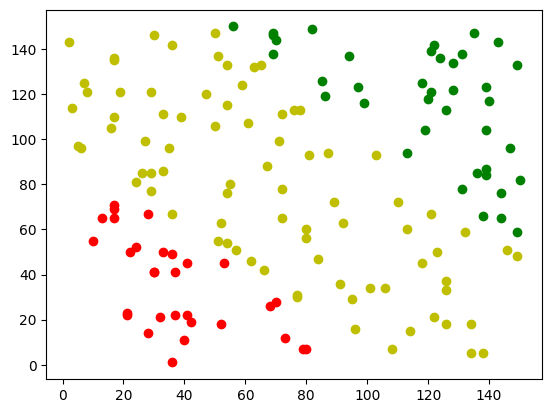

In [6]:
for i in range(len(X)):
  if Y[i] == 0:
    plt.plot(X[i][0],X[i][1],'ro')
  elif Y[i] == 1:
    plt.plot(X[i][0],X[i][1],'yo')
  else:
    plt.plot(X[i][0],X[i][1],'go')

In [7]:
Y = np.eye(3)[Y]

In [8]:
class NeuralNetwork(object):
  def __init__(self):
    inputLayerNeurons=2
    hiddenLayer1Neurons=64
    hiddenLayer2Neurons=32
    outLayerNeurons=3

    self.learning_rate=0.001
    self.W_H1I=np.random.randn(inputLayerNeurons,hiddenLayer1Neurons)
    self.W_H2H1=np.random.randn(hiddenLayer1Neurons,hiddenLayer2Neurons)
    self.W_OH2=np.random.randn(hiddenLayer2Neurons,outLayerNeurons)

  def sigmoid(self, x, der=False):
      if der:
          return x * (1 - x)
      else:
          return 1 / (1 + np.exp(-x))

  def feedForward(self,X):
    hidden1_input=np.dot(X,self.W_H1I)
    self.hidden1_output=self.sigmoid(hidden1_input)

    hidden2_input=np.dot(self.hidden1_output,self.W_H2H1)
    self.hidden2_output=self.sigmoid(hidden2_input)

    output_input=np.dot(self.hidden2_output,self.W_OH2)
    pred=self.sigmoid(output_input)
    return pred

  def  backForward(self,X,Y,pred):
    output_error=Y-pred
    output_delta=self.learning_rate*output_error*self.sigmoid(pred,der=True)

    hidden2_error=output_delta.dot(self.W_OH2.T)
    hidden2_delta=self.learning_rate*hidden2_error*self.sigmoid(self.hidden2_output,der=True)

    hidden1_error=hidden2_delta.dot(self.W_H2H1.T)
    hidden1_delta=self.learning_rate*hidden1_error*self.sigmoid(self.hidden1_output,der=True)

    self.W_H1I+=X.T.dot(hidden1_delta)
    self.W_H2H1+=self.hidden1_output.T.dot(hidden2_delta)
    self.W_OH2+=self.hidden2_output.T.dot(output_delta)
  def train(self,X,Y):
    output=self.feedForward(X)
    self.backForward(X,Y,output)


100%|██████████| 10000/10000 [00:09<00:00, 1002.76it/s]


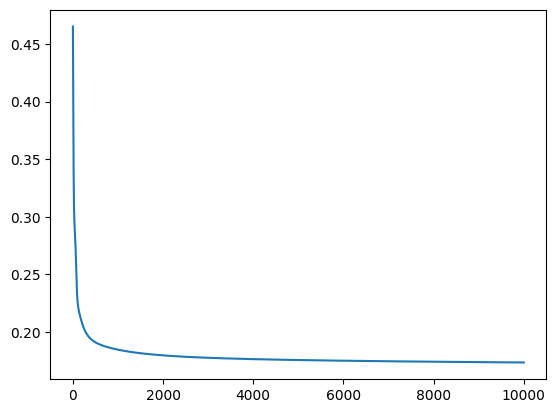

In [9]:
NN=NeuralNetwork()

err=[]

for i in tqdm(range(10000)):
  NN.train(X,Y)
  err.append(np.mean(np.square(Y-NN.feedForward(X))))
plt.plot(err)

In [10]:
print(NN.feedForward([100,20]))

[0.33250396 0.61553769 0.0896461 ]


In [11]:
print(NN.feedForward([150,120]))

[0.20367282 0.34309995 0.48793121]


In [12]:
print(NN.feedForward([40,20]))

[0.20654769 0.51967293 0.26365747]
